# Assignment 1

october 2022

- Cristina Marques
- r0780830
- UCLL Data and AI 3TI


## Python Modules

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

Let's try to figure out what the data is.
We go file by file and investigate the variables.

## Assessments

*This file contains information about assessments in module-presentations. Usually, every presentation has a number of assessments followed by the final exam.*

|variable                       |class          |description                    |notes                        |
|:------------------------------|:--------------|:------------------------------|:----------------------------|
|code_module                    |character      |identification code of the module||
|code_presentation              |character      |identification code of the presentation||
|id_assessment                  |number         |identification number of the assessment||
|assessment_type                |character      |type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam)||
|date                           |number         |information about the final submission date of the assessment|I don't really know how to interpret it. Also there are a lot of missing values. Would need further clarification |
|weight                         |double     |weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%||

In [143]:
assessments = pd.read_csv('data/assessments.csv')
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,NaN,10.0
1,AAA,2013J,1753,TMA,NaN,20.0
2,AAA,2013J,1754,TMA,NaN,20.0
3,AAA,2013J,1755,TMA,NaN,20.0
4,AAA,2013J,1756,TMA,NaN,30.0


In [144]:
# Check for missing values
assessments.isnull().sum()

code_module            0
code_presentation      0
id_assessment          0
assessment_type        0
date                 114
weight                 0
dtype: int64

In [145]:
# Don't really know how to deal with the missing dates, 
# but for now let's say this is an offset from a specific date
# Let's say the base date is 1/9/2020 for the start of the semester

# Convert the date to a datetime object, starting on 1/9/2020
def convert_date(offset_days):
    if pd.isnull(offset_days):
        return np.nan
    base_date = pd.to_datetime('2020-09-01')
    return base_date + pd.to_timedelta(offset_days, unit='d')

assessments['date'] = assessments['date'].apply(convert_date)

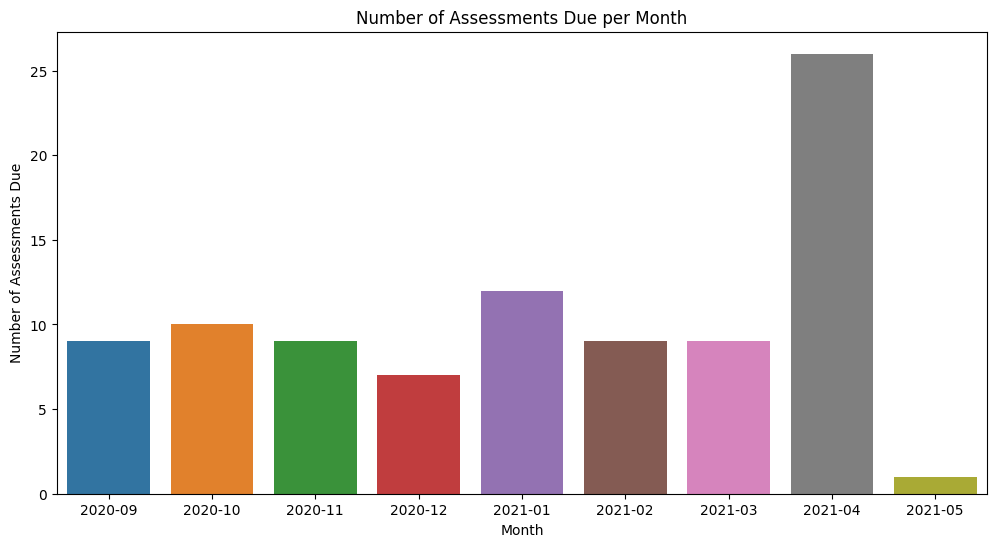

In [146]:
# Visualize when the assessments were due, per month
monthyear = assessments['date'].dt.to_period('M')

# Plot the number of assessments due per month
plt.figure(figsize=(12, 6))
x = monthyear.value_counts().sort_index()
sns.barplot(x=x.index, y=x.values)
plt.title('Number of Assessments Due per Month')
plt.xlabel('Month')
plt.ylabel('Number of Assessments Due')
plt.show()

What we did to the dates seems to have worked in this case.

In [147]:
assessments[assessments['date'].isnull()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,NaT,10.0
1,AAA,2013J,1753,TMA,NaT,20.0
2,AAA,2013J,1754,TMA,NaT,20.0
3,AAA,2013J,1755,TMA,NaT,20.0
4,AAA,2013J,1756,TMA,NaT,30.0
...,...,...,...,...,...,...
194,GGG,2014B,37427,TMA,NaT,0.0
196,GGG,2014J,37438,CMA,NaT,0.0
199,GGG,2014J,37441,CMA,NaT,0.0
202,GGG,2014J,37435,TMA,NaT,0.0


I couldn't find a reason why some assignments have no due date. Maybe the teachers were just nice and the students could submit when they want?

Would need more clarification from the business.

code_presentation  code_module  assessment_type
2013B              BBB          TMA                6
                                CMA                5
                                Exam               1
                   DDD          CMA                7
                                TMA                6
                                Exam               1
                   FFF          CMA                7
                                TMA                5
                                Exam               1
2013J              AAA          TMA                5
                                Exam               1
                   BBB          TMA                6
                                CMA                5
                                Exam               1
                   DDD          TMA                6
Name: assessment_type, dtype: int64


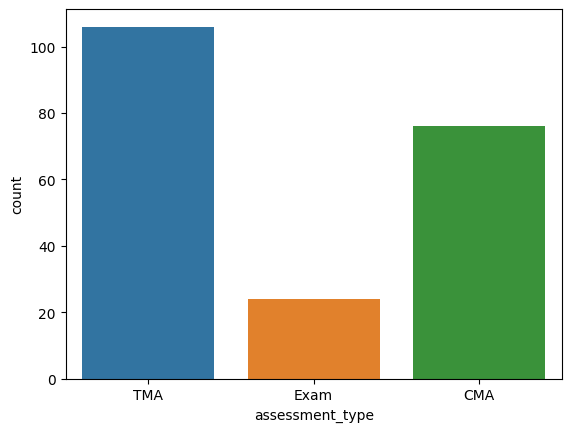

In [148]:
# get the count of assignments per code module per presentation
assessments_grouped = assessments.groupby(['code_presentation','code_module'])['assessment_type'].value_counts().head(15)
print(assessments_grouped)
# assessments_grouped.loc[assessments_grouped.index.get_level_values('assessment_type') == 'Exam']

# Visualize the amount of assessments per type
sns.countplot(x='assessment_type', data=assessments)
plt.show()

As we can see in the result above, the table description is correct:

Per presentation there are a few modules, each module has a few assessments and one exam.

## Courses

*File contains the list of all available modules and their presentations. The columns are:*

|variable                       |class          |description                    |notes                        |
|:------------------------------|:--------------|:------------------------------|:----------------------------|
|code_module                    |character      |code name of the module, which serves as the identifier||
|code_presentation              |character      |code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.||
|module_presentation_length     |number         |length of the module-presentation in days||

*The structure of B and J presentations may differ and therefore it is good practice to analyse the B and J presentations separately. Nevertheless, for some presentations the corresponding previous B/J presentation do not exist and therefore the J presentation must be used to inform the B presentation or vice versa. In the dataset this is the case of CCC, EEE and GGG modules.*

In [149]:
courses = pd.read_csv('data/courses.csv')
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2113J,268
1,AAA,2014J,269
2,BBB,2113J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [150]:
# Check for missing values
courses.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

## Student Assessment

*This file contains the results of students’ assessments. If the student does not submit the assessment, no result is recorded. The final exam submissions is missing, if the result of the assessments is not stored in the system. This file contains the following columns:*

|variable                       |class          |description                    |notes                        |
|:------------------------------|:--------------|:------------------------------|:----------------------------|
|id_assessment                  |number         |the identification number of the assessment||
|id_student                     |number         |a unique identification number for the student||
|date_submitted                 |number         |the date of student submission||
|is_banked                      |boolean        |a status flag indicating that the assessment is banked|0  or 1, I also don't really know what this means|
|score                          |double         |the student’s score in this assessment|0 to 100|

In [151]:
studentAssessment = pd.read_csv('data/studentAssessment.csv')
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [152]:
# Check for missing values
studentAssessment.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

The scores have missing values as explained above. These assignments were not delivered.
We will replace the "NaN" values with -1

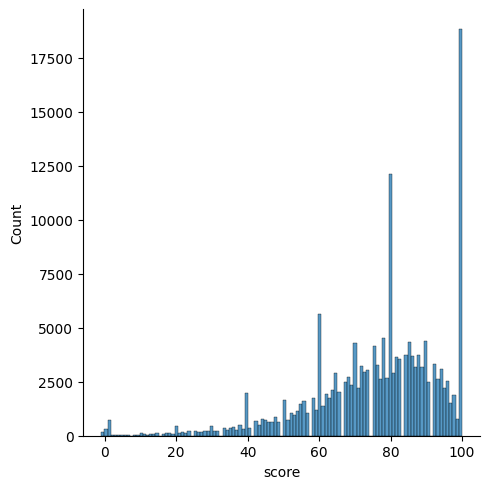

In [153]:
# Replace NaN with -1 in the score column
studentAssessment['score'].fillna(-1, inplace=True)

# Show the distribution of the scores
sns.displot(studentAssessment['score'])
plt.show()

Maybe we don't want to have non-delivered assignments into account when exploring the score values.

Let's make a different dataframe to hold the scores of only delivered assessments

In [154]:
# Remove columns where score is -1
studentAssessment_delivered = studentAssessment[studentAssessment['score'] != -1]

# Describe the scores
studentAssessment_delivered['score'].describe()

count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64

In [155]:
# Convert the date to a datetime object, starting on 1/9/2020
studentAssessment['date_submitted'] = studentAssessment['date_submitted'].apply(convert_date)

In [156]:
# When were the assessments submitted?
monthyear = studentAssessment['date_submitted'].dt.to_period('M')
monthyear.value_counts().sort_index()

2020-08     2057
2020-09    23872
2020-10    28815
2020-11    16307
2020-12    20277
2021-01    22704
2021-02    19300
2021-03    20606
2021-04    16930
2021-05     2972
2021-06        6
2021-07        5
2021-08        2
2021-09        8
2021-10        7
2021-11        1
2021-12       11
2022-01        4
2022-02        1
2022-03        1
2022-04       21
2022-05        5
Freq: M, Name: date_submitted, dtype: int64

Again, I don't understand how the dates work, but in my case there would be students submitting assignments even a month before the school begun! That seems a bit odd.

## Student Registration

*This file contains information about the time when the student registered for the module presentation. For students who unregistered the date of unregistration is also recorded. File contains five columns:*

|variable                       |class          |description                    |notes                        |
|:------------------------------|:--------------|:------------------------------|:----------------------------|
|code_module                    |character      |an identification code for a module||
|code_presentation              |character      |the identification code of the presentation||
|id_student                     |number         |a unique identification number for the student
|date_registration              |double         |the date of student’s registration on the module presentation|again, the weird number format that I will interpret but would need more clarification about|
|date_unregistration            |double         |date of student unregistration from the module presentation|same as above|

In [157]:
studentRegistration = pd.read_csv('data/studentRegistration.csv')
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [158]:
# Check for missing values
studentRegistration.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [159]:
# Rows where date_registration is null
print("Registrations with no registration date:", studentRegistration['date_registration'].isnull().sum())
studentRegistration[studentRegistration['date_registration'].isnull()].head()


Registrations with no registration date: 45


,code_module,code_presentation,id_student,date_registration,date_unregistration
2344,BBB,2013B,630346,NaN,NaN
2538,BBB,2013J,57369,NaN,-1.0
2759,BBB,2013J,342678,NaN,-33.0
5356,BBB,2014B,582496,NaN,-126.0
5490,BBB,2014B,607646,NaN,-38.0


It would be interesting to know why there are rows without registration date.

We won't remove them because they are not that many and would likely be because of an input mistake.

I will remove the registration date column but replace the unregistration date with a boolean "unregistered" so we can use this information later.

In [160]:
# Remove the date_registration column
studentRegistration.drop(columns=['date_registration'], inplace=True)

# Replace date_unregestration NaN with false and all the other values with true
studentRegistration['date_unregistration'] = studentRegistration['date_unregistration'].apply(lambda x: False if pd.isnull(x) else True)

# Rename the date_unregestration column to unregistered
studentRegistration.rename(columns={'date_unregistration': 'unregistered'}, inplace=True)

studentRegistration.head()

,code_module,code_presentation,id_student,unregistered
0,AAA,2013J,11391,False
1,AAA,2013J,28400,False
2,AAA,2013J,30268,True
3,AAA,2013J,31604,False
4,AAA,2013J,32885,False


## Student Info

*This file contains demographic information about the students together with their results. File contains the following columns:*

|variable                       |class          |description                    |notes                        |
|:------------------------------|:--------------|:------------------------------|:----------------------------|
|code_module                    |character      |an identification code for a module||
|code_presentation              |character      |the identification code of the presentation||
|id_student                     |number         |a unique identification number for the student||
|gender                         |character      |the student’s gender||
|region                         |character      |identifies the geographic region||
|highest_education              |character      |highest student education level on entry to the module presentation||
|imd_band                       |range (%)      |specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation||
|age_band                       |range (number) |band of the student’s age
|num_of_prev_attempts           |number         |the number times the student has attempted this module||
|studied_credits                |number         |the total number of credits for the modules the student is currently studying||
|disability                     |character      |indicates whether the student has declared a disability|(Y/N)|
|final_result                   |character      |student’s final result in the module-presentation||

In [161]:
studentInfo = pd.read_csv('data/studentInfo.csv')
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,NaN,NaN,28400,NaN,Scotland,NaN,20-30%,NaN,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [162]:
# Check for missing values
print(studentInfo.isnull().sum())

code_module             3446
code_presentation       3446
id_student                 0
gender                  3446
region                     0
highest_education       3446
imd_band                1111
age_band                3446
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64


The number of rows with missing values in the code_module, code_presentation, gender, highest_education and age_band columns are suspiciously the same.

Let's try to find out if they have anything in common.

In [163]:
studentInfo[studentInfo['code_module'].isnull()].head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
1,NaN,NaN,28400,NaN,Scotland,NaN,20-30%,NaN,0,60,N,Pass
6,NaN,NaN,45462,NaN,Scotland,NaN,30-40%,NaN,0,60,N,Pass
14,NaN,NaN,63400,NaN,Scotland,NaN,40-50%,NaN,0,60,N,Pass
62,NaN,NaN,164259,NaN,Scotland,NaN,70-80%,NaN,0,60,N,Pass
77,NaN,NaN,186149,NaN,Scotland,NaN,30-40%,NaN,0,60,N,Pass


It seems like all of these students are from Scotland. Let's confirm this.

In [164]:
scottish_students = studentInfo[studentInfo['region'] == 'Scotland']
print("--- Scottish students ---")
print("Not null values for gender:", scottish_students['gender'].notnull().sum())
print("Not null values for Highest education:", scottish_students['highest_education'].notnull().sum())
print("Not null values for Age band:", scottish_students['age_band'].notnull().sum())

print("\n--- Non-Scottish students ---")
non_scottish_students = studentInfo[studentInfo['region'] != 'Scotland']

print("Not null values for gender:", non_scottish_students['gender'].notnull().sum())
print("Null values for gender:", non_scottish_students['gender'].isnull().sum())

print("Not null values for Highest education:", non_scottish_students['highest_education'].notnull().sum())
print("Null values for highest education:", non_scottish_students['highest_education'].isnull().sum())


--- Scottish students ---
Not null values for gender: 0
Not null values for Highest education: 0
Not null values for Age band: 0

--- Non-Scottish students ---
Not null values for gender: 29147
Null values for gender: 0
Not null values for Highest education: 29147
Null values for highest education: 0


Let's do a null check on non-scottish students rows.

In [165]:
non_scottish_students.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1099
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

I could't find a justification for the missing imd_band values

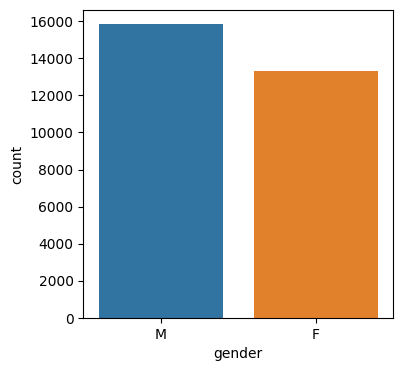

In [166]:
# Distribution of students per gender
plt.figure(figsize=(4, 4))
sns.countplot(x='gender', data=studentInfo)
plt.show()

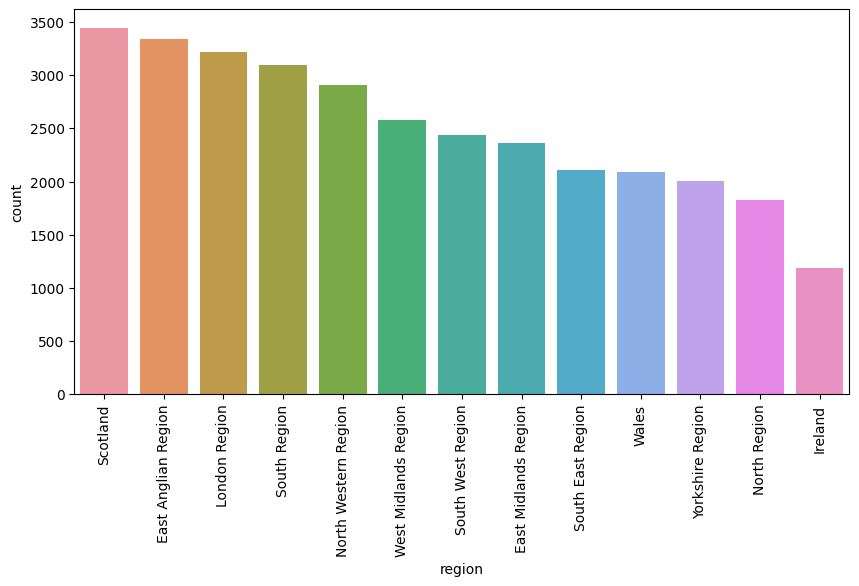

In [167]:
# Distribution of students per region
plt.figure(figsize=(10, 5))
sns.countplot(x='region', data=studentInfo, order=studentInfo['region'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

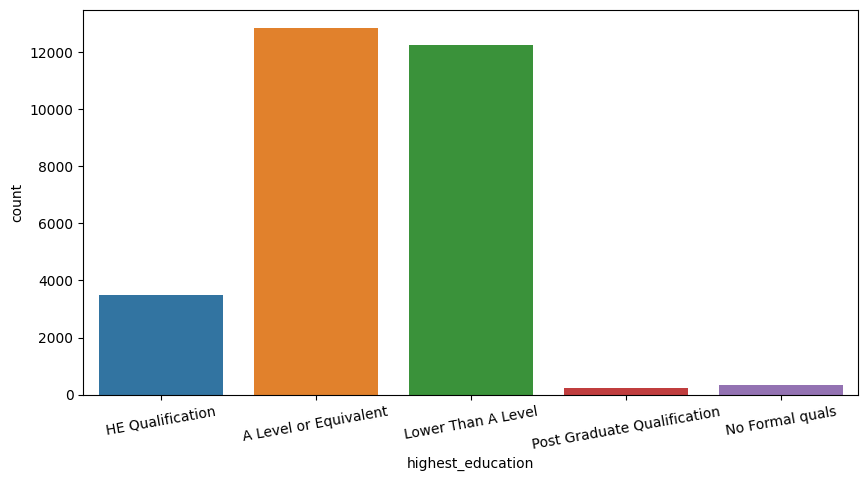

In [168]:
# Distribution of students per highest_education
plt.figure(figsize=(10,5))
plt.xticks(rotation=10)
sns.countplot(x='highest_education', data=studentInfo)
plt.show()

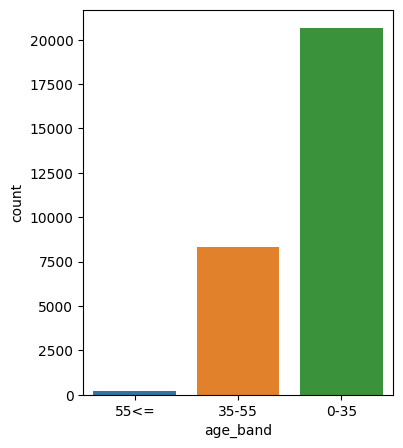

In [169]:
# Distribution of students per age band
plt.figure(figsize=(4, 5))
sns.countplot(x='age_band', data=studentInfo)
plt.show()

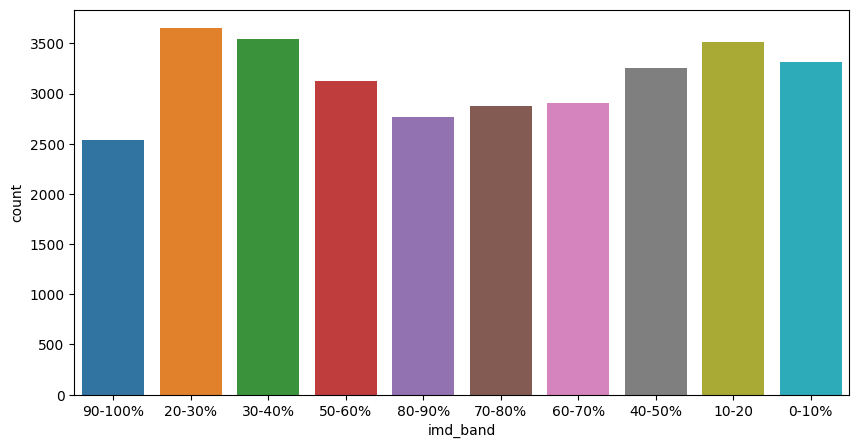

In [170]:
# Distribution of students per imd band
plt.figure(figsize=(10, 5))
sns.countplot(x='imd_band', data=studentInfo)
plt.show()

There are weird values in the imd_band column.

Let's turn them into an actual usable value. The range is from 0-10 to 90-100, so we can convert it into a 1 to 10 scale, 1 meaning "0-10" and 10 meaning "90-100"

In [171]:
studentInfo['imd_band'] = studentInfo['imd_band'].apply(lambda x: int(x[0])+1 if not pd.isnull(x) else x)
studentInfo.head()

# Another approch with panda intervals:
# def make_interval(x):
#     if pd.isnull(x):
#         return x
#     else:
#         n = int(x[0])*10
#         return pd.Interval(n, n+10, closed='both')

# studentInfo['imd_band'] = studentInfo['imd_band'].apply(make_interval)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,10.0,55<=,0,240,N,Pass
1,NaN,NaN,28400,NaN,Scotland,NaN,3.0,NaN,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,4.0,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,6.0,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,6.0,0-35,0,60,N,Pass


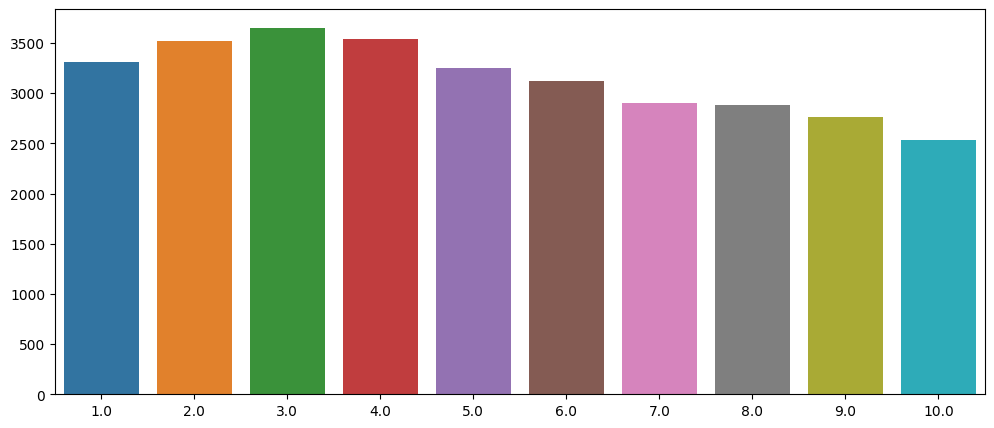

In [172]:
studentInfo['imd_band'].value_counts().sort_index()

# Distribution of students per imd band
plt.figure(figsize=(12, 5))
x = studentInfo['imd_band'].value_counts().sort_index() # The only way I found to get the intervals in proper order
sns.barplot(x=x.index, y=x.values)
plt.show()

In [173]:
# Students below 30% Multiple deprivation index
print(round(studentInfo[studentInfo['imd_band'] <= 3]['id_student'].count() / studentInfo['id_student'].count() * 100, 2), '%')

32.16 %


In [174]:
# Disabled students
print(round(studentInfo[studentInfo['disability'] == 'Y']['id_student'].count() / studentInfo['id_student'].count() * 100, 2), '%')

9.71 %


## Student VLE

*The studentVle.csv file contains information about each student’s interactions with the materials in the VLE (Virtual Learning Environment). This file contains the following columns:*

|variable                       |class          |description                    |notes                        |
|:------------------------------|:--------------|:------------------------------|:----------------------------|
|code_module                    |character      |an identification code for a module||
|code_presentation              |character      |the identification code of the presentation||
|id_student                     |number         |a unique identification number for the student||
|id_site                        |number         |an identification number for the VLE material||
|date                           |number         |the date of student’s interaction with the material||
sum_click                       |number         |the number of times a student interacts with the material on that date

In [175]:
student_vle = pd.read_csv('data/studentVle.csv')
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [176]:
# Check for missing values
student_vle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [177]:
# Amount of sites per presentation
student_vle.groupby('code_presentation')['id_site'].unique().apply(lambda x: len(x))

code_presentation
2013B    1223
2013J    1755
2014B    1641
2014J    1649
Name: id_site, dtype: int64

In [178]:
# Amount of different sites
len(student_vle['id_site'].unique())

6268

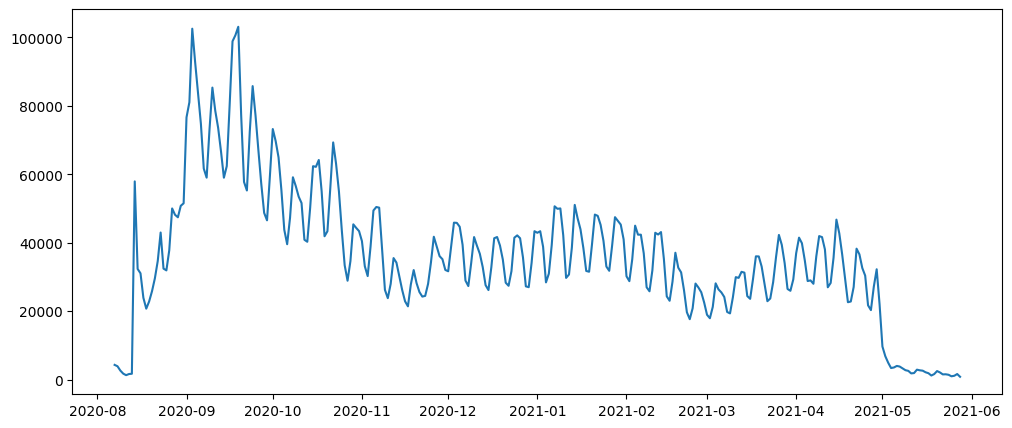

In [179]:
# When are students most active?
# We have to group the data first otherwise it takes too long to convert the dates on all rows
grouped_by_date = student_vle.groupby('date')['id_student'].count()
grouped_by_date.index = grouped_by_date.index.map(convert_date)

plt.figure(figsize=(12, 5))
plt.plot(grouped_by_date)
plt.show()